# **Proyek Kedua Machine Learning Terapan - Recommendation System**

**Nama: Zidan Muhammad Ikvan** |
**Cohort ID: MC404D5Y0059** |
**Email: zidanikvan@gmail.com**

## **1. Project Description**

Industri perfilman global menghasilkan ribuan film setiap tahunnya, menawarkan pilihan hiburan yang sangat beragam bagi penonton. Platform streaming dan database film seperti Netflix, IMDb, dan TMDB memiliki katalog yang sangat besar, mencakup berbagai genre, era, dan bahasa. Meskipun kekayaan pilihan ini merupakan keuntungan, hal ini juga dapat menimbulkan tantangan bagi pengguna: information overload. Pengguna seringkali kesulitan menemukan film yang sesuai dengan selera dan preferensi unik mereka di tengah lautan konten yang luas.

Di sinilah sistem rekomendasi berperan penting. Sistem rekomendasi adalah alat perangkat lunak yang dirancang untuk menyaring informasi dan menyajikan item (dalam hal ini, film) yang paling mungkin relevan atau menarik bagi pengguna tertentu. Dengan menganalisis preferensi pengguna, riwayat tontonan, dan karakteristik film, sistem ini dapat memberikan saran yang dipersonalisasi, meningkatkan pengalaman pengguna, dan mendorong keterlibatan ( engagement) pada platform.

Proyek ini bertujuan untuk merancang, mengembangkan, dan mengevaluasi sistem rekomendasi film menggunakan dataset "The Movies Dataset" dengan melalui beberapa tahapan, yaitu:
1. Project Description
2. Import Library/Package
3. Data Understanding
4. Exploratory Data Analysis
5. Data Preparation
6. Model Development dengan Content Based Filtering
7. Model Development dengan Collaborative Filtering




## **2. Import Library/Package**

In [2]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463317 sha256=922b0e2ea2a28115c2c48813916d9c77bd760d3f9fe1b226d4cbe16f229a8630
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [2]:
# --- Library untuk Manipulasi & Analisis Data ---
import pandas as pd
import numpy as np

# --- Library untuk Visualisasi Data ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Library untuk Preprocessing & Modeling ---
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- Library untuk Collaborative Filtering ---
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

# --- Lain-lain ---
import ast
import warnings
warnings.filterwarnings('ignore') # Mengabaikan pesan warning

print("Semua library berhasil diimpor!")

Semua library berhasil diimpor!


## **3. Data Understanding**

Pada tahap ini, saya melakukan beberapa langkah penting, yaitu:

1. Membaca file CSV menggunakan pandas dan menyimpannya dalam variabel yang ditentukan.
2.  Menampilkan 5 baris pertama dari dataset, sehingga bisa melihat isi dan struktur awal data (seperti kolom dan nilai-nilainya).
3. Menampilkan dimensi dari dataset, yaitu jumlah baris (data) dan kolom.
4. Memberikan ringkasan informasi tentang dataset
5. Mengecek apakah ada nilai kosong (null/NaN) di setiap kolom dataset.
6. Mengecek apakah ada baris duplikat dalam dataset.

##### **3.1 Ratings**

In [3]:
ratings = pd.read_csv('/content/drive/MyDrive/SEM 4/folderku/ratings_small.csv')

# Menampilkan 5 data teratas
print("Preview Data ratings:")
display(ratings.head())

Preview Data ratings:


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
print("Shape:", ratings.shape)

Shape: (100004, 4)


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [7]:
ratings.duplicated().sum()

0

##### **3.2 Movies**

In [8]:
movies = pd.read_csv('/content/drive/MyDrive/SEM 4/folderku/movies_metadata.csv')

# Menampilkan 5 data teratas
print("Preview Data movies:")
display(movies.head())

Preview Data movies:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
print("Shape:", movies.shape)

Shape: (45466, 24)


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [11]:
movies[['id', 'title', 'genres', 'overview']].head()

,id,title,genres,overview
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...


In [12]:
movies.isnull().sum()

,0
adult,0
belongs_to_collection,40972
budget,0
genres,0
homepage,37684
id,0
imdb_id,17
original_language,11
original_title,0
overview,954


In [13]:
movies.duplicated().sum()

13

##### **3.3 Links**

In [14]:
links = pd.read_csv('/content/drive/MyDrive/SEM 4/folderku/links_small.csv')

# Menampilkan 5 data teratas
print("Preview Data links:")
display(links.head())

Preview Data links:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
print("Shape:", links.shape)

Shape: (9125, 3)


In [16]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [17]:
links.isnull().sum()

,0
movieId,0
imdbId,0
tmdbId,13


In [18]:
links.duplicated().sum()

0

#####**3.4 Keywords**

In [19]:
keywords = pd.read_csv('/content/drive/MyDrive/SEM 4/folderku/keywords.csv')

# Menampilkan 5 data teratas
print("Preview Data keywords:")
display(keywords.head())

Preview Data keywords:


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [20]:
print("Shape:", keywords.shape)

Shape: (46419, 2)


In [21]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [22]:
keywords.isnull().sum()

,0
id,0
keywords,0


In [23]:
keywords.duplicated().sum()

987

##### **3.5 Credits**

In [24]:
credits = pd.read_csv('/content/drive/MyDrive/SEM 4/folderku/credits.csv')

# Menampilkan 5 data teratas
print("Preview Data credits:")
display(credits.head())

Preview Data credits:


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [25]:
print("Shape:", credits.shape)

Shape: (45476, 3)


In [26]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [27]:
credits.isnull().sum()

,0
cast,0
crew,0
id,0


In [28]:
credits.duplicated().sum()

37

## **4. Exploratory Data Analysis**

Tahapan Exploratory Data Analysis dilakukan untuk mengidentifikasi potensi permasalahan, serta menemukan pola yang berguna untuk tahap persiapan data dan pemodelan. Berikut adalah langkah-langkah EDA yang telah saya lakukan:

##### **4.1 Visualisasi Distribusi Rating Pengguna**

Menampilkan distribusi jumlah rating yang diberikan oleh pengguna pada film. Visualisasi menggunakan bar chart (countplot) untuk menunjukkan seberapa sering masing-masing nilai rating diberikan.

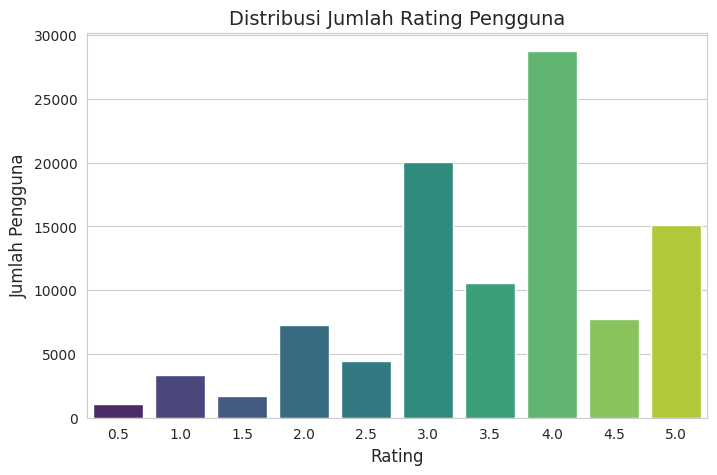

In [29]:
# Set style visualisasi
sns.set_style('whitegrid')

plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribusi Jumlah Rating Pengguna', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.show()

##### **4.2 Visualisasi Distribusi Popularitas Film**

kolom popularity dikonversi ke format numerik dan nilai NaN dihapus untuk keperluan visualisasi. Data popularitas film divisualisasikan menggunakan histogram dengan KDE (kurva distribusi) untuk memahami sebaran nilai popularitas. Nilai popularitas dibatasi pada rentang 0 hingga 50 agar grafik lebih terbaca.

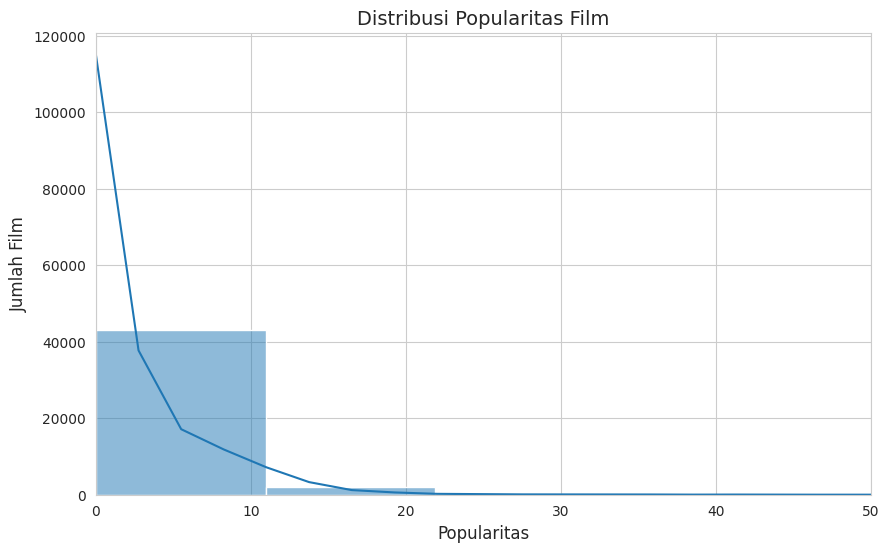

In [30]:
# Ubah 'popularity' ke numerik, error akan jadi NaN
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

# Hapus NaN untuk visualisasi atau isi dengan 0/median
popularity_data = movies['popularity'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(popularity_data, bins=50, kde=True)
plt.title('Distribusi Popularitas Film', fontsize=14)
plt.xlabel('Popularitas', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.xlim(0, 50)
plt.show()

##### **4.3 Visualisasi Distribusi Rata-Rata Vote Film**

Memvisualisasikan distribusi nilai rata-rata vote_average dari setiap film menggunakan histogram. Grafik ini membantu melihat kecenderungan umum penilaian film oleh pengguna.

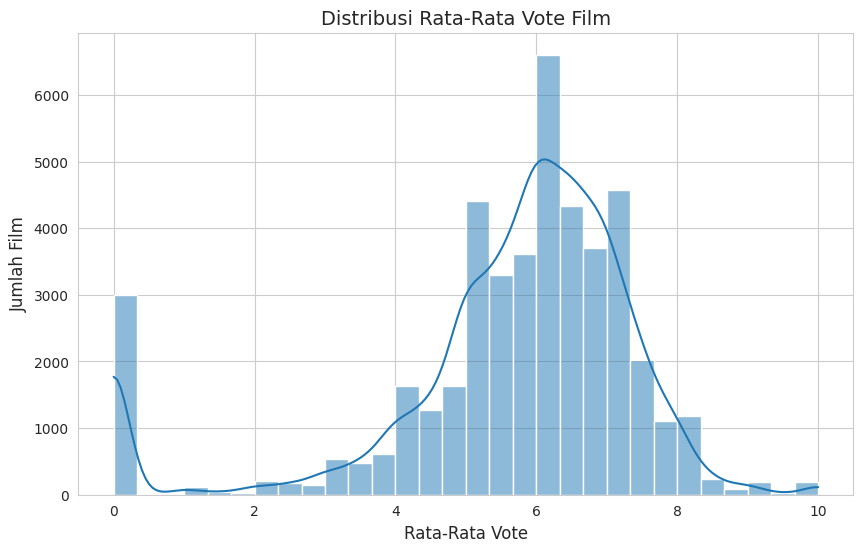

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'].dropna(), bins=30, kde=True)
plt.title('Distribusi Rata-Rata Vote Film', fontsize=14)
plt.xlabel('Rata-Rata Vote', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.show()

##### **4.4 Ekstraksi dan Identifikasi Genre yang Tidak Valid**

Mengekstrak nama genre dari kolom genres yang berupa string JSON dan mendeteksi entri yang kemungkinan salah, seperti nama perusahaan film. Data yang mencurigakan dikumpulkan ke dalam df_problematic untuk ditinjau lebih lanjut.

In [32]:
def extract_genres(text):
    try:
        genres_list = ast.literal_eval(text)
        if isinstance(genres_list, list):
            return [genre['name'] for genre in genres_list if 'name' in genre]
    except:
        return []
    return []

# Asumsikan DataFrame movies sudah ada sebelumnya
if 'genre_names' not in movies.columns or movies['genre_names'].isnull().all():
    print("Menerapkan fungsi extract_genres...")
    movies['genre_names'] = movies['genres'].apply(extract_genres)

suspicious_keywords = [
    "production", "pictures", "entertainment", "films", "studios",
    "group", "inc", "llc", "limited", "company", "corporation",
    "organization", "television", "tv", "channel"
]

problematic_entries = []

for idx, row in movies.iterrows():
    extracted = row['genre_names']
    if isinstance(extracted, list):
        suspicious = [name for name in extracted if isinstance(name, str) and any(k in name.lower() for k in suspicious_keywords)]
        if suspicious:
            problematic_entries.append({
                'index_film': idx,
                'title': row.get('title', 'N/A'),
                'original_genres_string': row['genres'],
                'extracted_genre_names': extracted,
                'suspicious_names_detected': list(set(suspicious))
            })

if problematic_entries:
    df_problematic = pd.DataFrame(problematic_entries)
    print(f"Ditemukan {len(df_problematic)} entri yang mungkin salah mengekstrak nama entitas non-genre:")
    display(df_problematic.head(10))

Menerapkan fungsi extract_genres...
Ditemukan 770 entri yang mungkin salah mengekstrak nama entitas non-genre:


,index_film,title,original_genres_string,extracted_genre_names,suspicious_names_detected
0,306,Rent-a-Kid,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...","[Comedy, Family, TV Movie]",[TV Movie]
1,565,Wide Eyed and Legless,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...","[TV Movie, Drama, Romance, Comedy]",[TV Movie]
2,1371,Inside,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[Crime, Drama, TV Movie]",[TV Movie]
3,1763,Go Now,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...","[Romance, Drama, TV Movie]",[TV Movie]
4,2191,Love Is the Devil: Study for a Portrait of Fra...,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...","[TV Movie, Drama]",[TV Movie]
5,2481,Photographer,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 36,...","[TV Movie, History, Documentary, War]",[TV Movie]
6,3292,Babymother,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...","[Drama, Music, TV Movie]",[TV Movie]
7,6213,Hysterical Blindness,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...","[TV Movie, Drama, Romance]",[TV Movie]
8,7332,Wit,"[{'id': 18, 'name': 'Drama'}, {'id': 10770, 'n...","[Drama, TV Movie]",[TV Movie]
9,7716,Skokie,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...","[TV Movie, Drama]",[TV Movie]


##### **4.5 Analisis Frekuensi Genre Tidak Valid**

Setelah data mencurigakan dikumpulkan, kode ini menghitung frekuensi kemunculan genre yang terdeteksi sebagai tidak valid. Hasil ini membantu dalam evaluasi kualitas data ekstraksi awal.

In [33]:
if 'df_problematic' in locals() and not df_problematic.empty:
    all_suspicious_names_flat_list = [name for sublist in df_problematic['suspicious_names_detected'] for name in sublist]

    from collections import Counter
    suspicious_name_counts = Counter(all_suspicious_names_flat_list)

    print("\nFrekuensi nama-nama yang terdeteksi sebagai 'mencurigakan':")
    for name, count in suspicious_name_counts.most_common():
        print(f"- {name}: {count} kali")
else:
    print("DataFrame 'df_problematic' tidak ditemukan atau kosong.")


Frekuensi nama-nama yang terdeteksi sebagai 'mencurigakan':
- TV Movie: 767 kali
- Carousel Productions: 1 kali
- Telescene Film Group Productions: 1 kali
- Vision View Entertainment: 1 kali
- Mardock Scramble Production Committee: 1 kali
- BROSTA TV: 1 kali
- Pulser Productions: 1 kali


##### **4.6 Penyempurnaan Fungsi Ekstraksi Genre**

Fungsi ekstraksi genre diperbaiki agar hanya mengambil nama genre yang valid, yaitu elemen dengan struktur dictionary dan memiliki kunci 'id' dan 'name'. Kolom baru genre_names_refined dibuat sebagai hasil dari ekstraksi yang lebih akurat. Juga dilakukan perbandingan jumlah genre unik sebelum dan sesudah penyempurnaan.

In [34]:
def extract_genres_refined(text):
    try:
        data_list = ast.literal_eval(text) # Mengubah string menjadi list of dictionaries
        if isinstance(data_list, list):
            genre_names = []
            for item in data_list:
                # Hanya proses item jika berupa dictionary DAN memiliki 'id' dan 'name'
                if isinstance(item, dict) and 'id' in item and 'name' in item:
                    genre_names.append(item['name'])
            return genre_names
    except (ValueError, SyntaxError): # Menangani error jika string tidak valid
        return []
    return []

# Menerapkan fungsi yang disempurnakan
movies['genre_names_refined'] = movies['genres'].apply(extract_genres_refined)

# Untuk sekarang, mari kita lihat contoh beberapa hasil dari kolom baru
print("Contoh hasil ekstraksi genre yang disempurnakan:")
display(movies[['title', 'genres', 'genre_names', 'genre_names_refined']].head())

# Membandingkan jumlah genre unik sebelum dan sesudah penyempurnaan
original_genre_explode = movies['genre_names'].explode()
refined_genre_explode = movies['genre_names_refined'].explode()

print(f"\nJumlah genre unik sebelum penyempurnaan: {original_genre_explode.nunique()}")
print(f"Jumlah genre unik setelah penyempurnaan: {refined_genre_explode.nunique()}")
print("\nContoh genre unik setelah penyempurnaan (10 terbanyak):")
print(refined_genre_explode.value_counts().head(10))

Contoh hasil ekstraksi genre yang disempurnakan:


,title,genres,genre_names,genre_names_refined
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]","[Animation, Comedy, Family]"
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]","[Romance, Comedy]"
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],[Comedy]



Jumlah genre unik sebelum penyempurnaan: 32
Jumlah genre unik setelah penyempurnaan: 32

Contoh genre unik setelah penyempurnaan (10 terbanyak):
genre_names_refined
Drama              20265
Comedy             13182
Thriller            7624
Romance             6735
Action              6596
Horror              4673
Crime               4307
Documentary         3932
Adventure           3496
Science Fiction     3049
Name: count, dtype: int64


##### **4.7 Visualisasi Frekuensi Genre**

memvisualisasikan frekuensi kemunculan genre dari hasil ekstraksi yang telah disempurnakan menggunakan bar chart horizontal. Tujuannya adalah untuk memahami genre apa saja yang paling dominan.



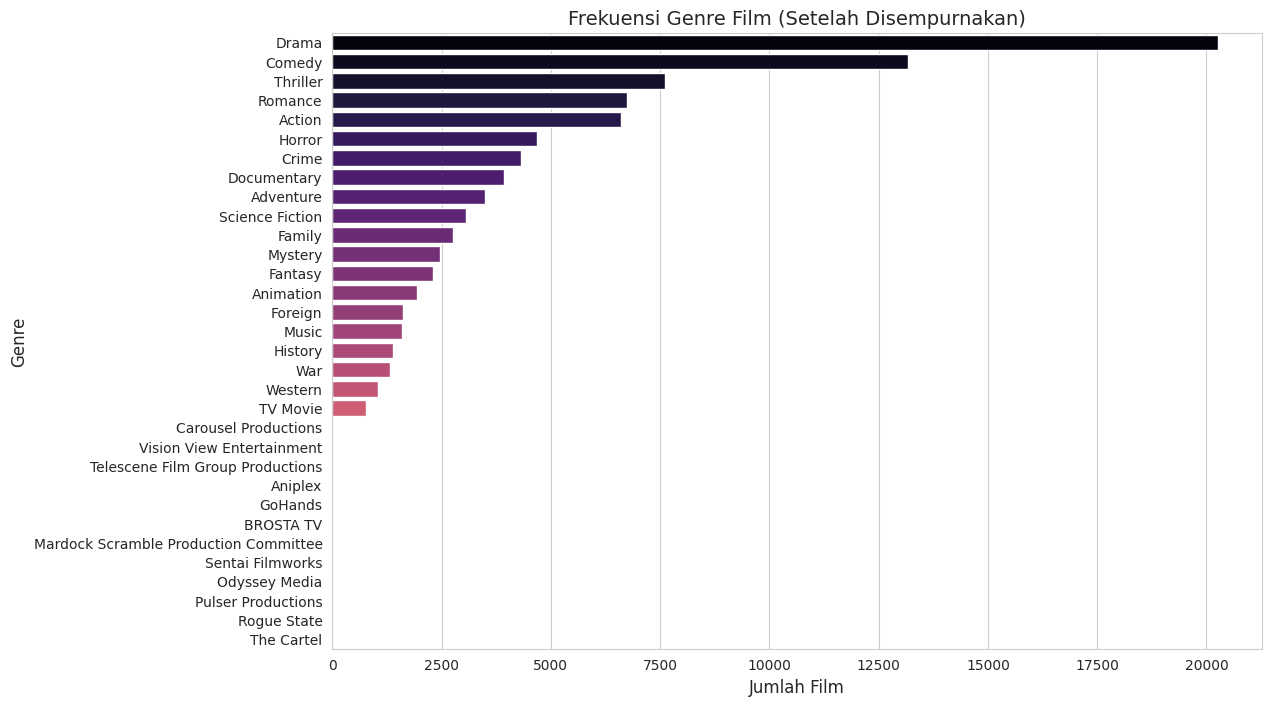

In [35]:
# Hitung frekuensi setiap genre dari kolom yang sudah disempurnakan
all_genres_refined = movies['genre_names_refined'].explode()
genre_counts_refined = all_genres_refined.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts_refined.values, y=genre_counts_refined.index, palette='magma', orient='h')
plt.title('Frekuensi Genre Film (Setelah Disempurnakan)', fontsize=14)
plt.xlabel('Jumlah Film', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

##### **4.8 Analisis Jumlah Rating per Pengguna**

Menghitung berapa banyak rating yang diberikan oleh masing-masing pengguna, lalu menampilkan deskripsi statistik dan visualisasi distribusinya. Hal ini membantu mengetahui pola perilaku pengguna, seperti seberapa aktif mereka memberi rating.

--- Jumlah Rating per Pengguna ---
count     671.000000
mean      149.037258
std       231.226948
min        20.000000
25%        37.000000
50%        71.000000
75%       161.000000
max      2391.000000
Name: rating, dtype: float64


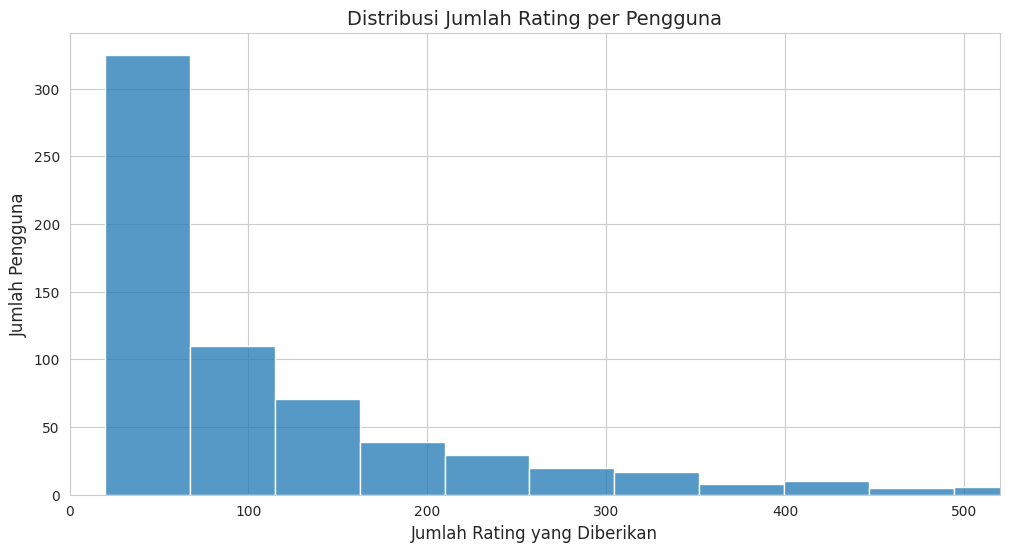

In [36]:
ratings_per_user = ratings.groupby('userId')['rating'].count()

print("--- Jumlah Rating per Pengguna ---")
print(ratings_per_user.describe())

plt.figure(figsize=(12, 6))
sns.histplot(ratings_per_user, bins=50, kde=False)
plt.title('Distribusi Jumlah Rating per Pengguna', fontsize=14)
plt.xlabel('Jumlah Rating yang Diberikan', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xlim(0, ratings_per_user.quantile(0.95))
plt.show()

##### **4.9 Analisis Jumlah Rating per Film**

Menganalisis seberapa banyak rating yang diterima setiap film. Distribusinya divisualisasikan agar bisa mengidentifikasi film populer (banyak dinilai) dan film yang jarang mendapat perhatian.




--- Jumlah Rating per Film ---
count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
Name: rating, dtype: float64


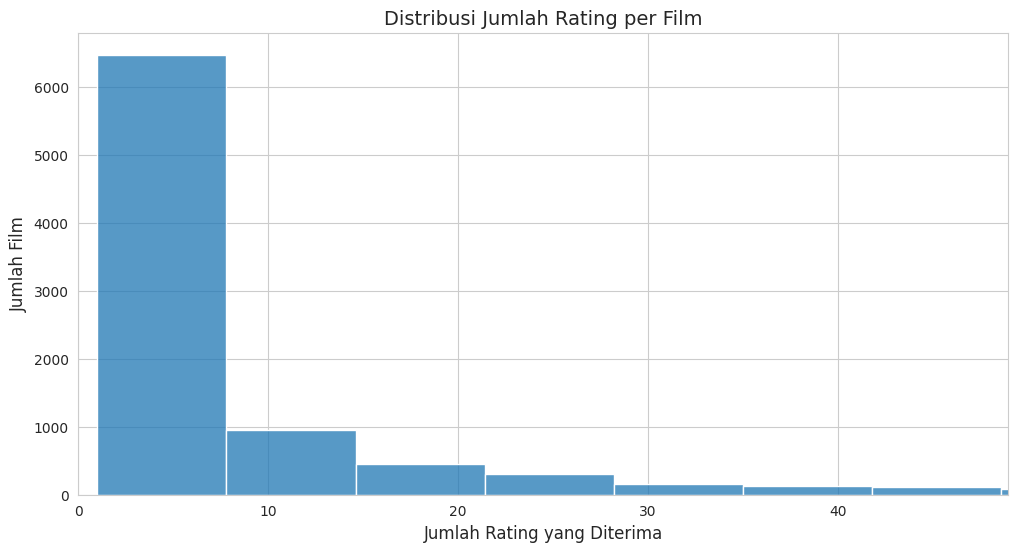

In [37]:
ratings_per_movie = ratings.groupby('movieId')['rating'].count()

print("\n--- Jumlah Rating per Film ---")
print(ratings_per_movie.describe())

plt.figure(figsize=(12, 6))
sns.histplot(ratings_per_movie, bins=50, kde=False)
plt.title('Distribusi Jumlah Rating per Film', fontsize=14)
plt.xlabel('Jumlah Rating yang Diterima', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.xlim(0, ratings_per_movie.quantile(0.95))
plt.show()

##### **4.10 Ekstraksi dan Visualisasi Tahun Rilis Film**
Kode ini mengonversi kolom release_date menjadi format datetime, mengekstrak tahun rilis, dan menghapus entri yang tidak valid. Kemudian divisualisasikan distribusi jumlah film berdasarkan tahun rilis sejak 1900, untuk melihat tren produksi film sepanjang waktu.

Jumlah film dengan tanggal rilis yang tidak valid/kosong: 90


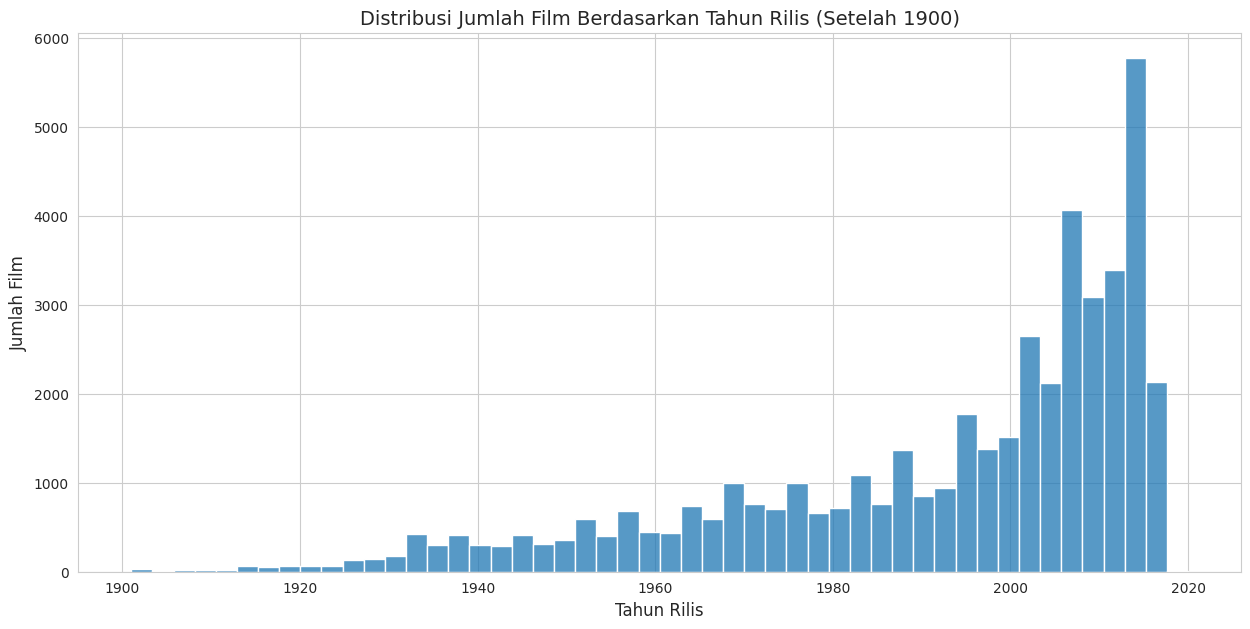


--- Tahun dengan Jumlah Film Terbanyak (Top 15) ---
release_year
2014.0    1974
2015.0    1905
2013.0    1889
2012.0    1722
2011.0    1667
2016.0    1604
2009.0    1586
2010.0    1501
2008.0    1473
2007.0    1320
2006.0    1270
2005.0    1125
2004.0     992
2002.0     905
2003.0     882
Name: count, dtype: int64


In [38]:
# Konversi 'release_date' ke datetime. Kesalahan parsing akan menjadi NaT (Not a Time).
movies['release_date_dt'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Ekstrak tahun. Jika ada NaT, hasilnya akan NaN.
movies['release_year'] = movies['release_date_dt'].dt.year

print(f"Jumlah film dengan tanggal rilis yang tidak valid/kosong: {movies['release_year'].isnull().sum()}")

valid_years = movies['release_year'].dropna()
valid_years = valid_years[valid_years > 1900]

plt.figure(figsize=(15, 7))
sns.histplot(valid_years, bins=50, kde=False)
plt.title('Distribusi Jumlah Film Berdasarkan Tahun Rilis (Setelah 1900)', fontsize=14)
plt.xlabel('Tahun Rilis', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.show()

print("\n--- Tahun dengan Jumlah Film Terbanyak (Top 15) ---")
print(valid_years.value_counts().nlargest(15))

## **5. Data Preparation**

Tahap Data Preparation dilakukan untuk membersihkan, merapikan, dan menyatukan berbagai sumber data sehingga siap digunakan dalam proses pemodelan. Berikut adalah tahapan yang telah dilakukan:

### **5.1 Movies**

**1. Penanganan Kolom id**

In [39]:
print(f"Tipe data kolom 'id' sebelum diubah: {movies['id'].dtype}")

# konversi 'id' ke numerik. Nilai yang tidak bisa dikonversi akan menjadi NaT/NaN (errors='coerce')
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

# Cek berapa banyak ID yang gagal dikonversi (menjadi NaN)
print(f"Jumlah ID yang gagal dikonversi (NaN): {movies['id'].isnull().sum()}")

# Jika ada ID yang NaN, perlu ditangani.
if movies['id'].isnull().sum() > 0:
    print(f"Shape movies sebelum drop NaN id: {movies.shape}")
    movies.dropna(subset=['id'], inplace=True)
    print(f"Shape movies setelah drop NaN id: {movies.shape}")

# ubah ke integer (jika tidak ada desimal)
if movies['id'].notnull().all(): # memastikan tidak ada NaN lagi
    movies['id'] = movies['id'].astype(int)

print(f"Tipe data kolom 'id' setelah diubah: {movies['id'].dtype}")
print(f"Jumlah nilai unik di kolom 'id': {movies['id'].nunique()}")
print(f"Total baris: {len(movies)}")

Tipe data kolom 'id' sebelum diubah: object
Jumlah ID yang gagal dikonversi (NaN): 3
Shape movies sebelum drop NaN id: (45466, 28)
Shape movies setelah drop NaN id: (45463, 28)
Tipe data kolom 'id' setelah diubah: int64
Jumlah nilai unik di kolom 'id': 45433
Total baris: 45463


**2. Penanganan Duplikat**

In [40]:
print(f"Shape movies sebelum menghapus duplikat 'id': {movies.shape}")
# mempertahankan entri pertama jika ada duplikat 'id'
movies.drop_duplicates(subset=['id'], keep='first', inplace=True)
print(f"Shape movies setelah menghapus duplikat 'id': {movies.shape}")

Shape movies sebelum menghapus duplikat 'id': (45463, 28)
Shape movies setelah menghapus duplikat 'id': (45433, 28)


**3. Penanganan Kolom adult**

In [41]:
print("\nNilai unik di kolom 'adult' sebelum diproses:")
print(movies['adult'].value_counts())

expected_adult_values = ['True', 'False']
condition_to_drop = ~movies['adult'].isin(expected_adult_values)

if condition_to_drop.sum() > 0:
    print(f"\nAda {condition_to_drop.sum()} baris dengan nilai 'adult' yang tidak valid. Baris-baris ini akan dihapus.")
    print(f"Shape movies sebelum menghapus baris 'adult' tidak valid: {movies.shape}")
    movies = movies[~condition_to_drop]
    print(f"Shape movies setelah menghapus baris 'adult' tidak valid: {movies.shape}")

# konversi ke boolean
movies['adult'] = movies['adult'].map({'True': True, 'False': False})

print("\nNilai unik di kolom 'adult' setelah diproses:")
print(movies['adult'].value_counts())
print(f"Tipe data kolom 'adult': {movies['adult'].dtype}")


Nilai unik di kolom 'adult' sebelum diproses:
adult
False    45424
True         9
Name: count, dtype: int64

Nilai unik di kolom 'adult' setelah diproses:
adult
False    45424
True         9
Name: count, dtype: int64
Tipe data kolom 'adult': bool


**4. Penanganan Kolom budget**

In [42]:
print(f"\nTipe data kolom 'budget' sebelum diubah: {movies['budget'].dtype}")

# Coba konversi 'budget' ke numerik.
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')

# Cek berapa banyak budget yang gagal dikonversi (menjadi NaN)
print(f"Jumlah 'budget' yang gagal dikonversi (NaN): {movies['budget'].isnull().sum()}")

# mengubah type data budget
movies['budget'] = movies['budget'].astype('float64')

print(f"Tipe data kolom 'budget' setelah diubah: {movies['budget'].dtype}")
print("\nDeskripsi kolom 'budget':")
print(movies['budget'].describe())


Tipe data kolom 'budget' sebelum diubah: object
Jumlah 'budget' yang gagal dikonversi (NaN): 0
Tipe data kolom 'budget' setelah diubah: float64

Deskripsi kolom 'budget':
count    4.543300e+04
mean     4.224549e+06
std      1.742799e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64


**5. Penanganan Kolom revenue**

In [43]:
print(f"Tipe data kolom 'revenue' sebelum diubah: {movies['revenue'].dtype}")

# Konversi 'revenue' ke numerik.
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')
# Jika ada NaN setelah konversi, jumlahnya akan ditampilkan:
print(f"Jumlah 'revenue' yang menjadi NaN setelah konversi (jika ada): {movies['revenue'].isnull().sum()}")

movies['revenue'] = movies['revenue'].astype('float64')

print(f"Tipe data kolom 'revenue' setelah diubah: {movies['revenue'].dtype}")
print("\nDeskripsi kolom 'revenue':")
print(movies['revenue'].describe())

Tipe data kolom 'revenue' sebelum diubah: float64
Jumlah 'revenue' yang menjadi NaN setelah konversi (jika ada): 3
Tipe data kolom 'revenue' setelah diubah: float64

Deskripsi kolom 'revenue':
count    4.543000e+04
mean     1.121288e+07
std      6.435213e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64


**6. Penanganan Kolom popularity**

In [44]:
print(f"\nTipe data kolom 'popularity' saat ini: {movies['popularity'].dtype}")

# Cek NaN
print(f"Jumlah NaN di 'popularity': {movies['popularity'].isnull().sum()}")
# Jika ada NaN, kita bisa isi dengan 0 atau median
movies['popularity'].fillna(0, inplace=True)
movies['popularity'] = movies['popularity'].astype('float64')

print(f"Tipe data kolom 'popularity' setelah penyesuaian: {movies['popularity'].dtype}")
print("\nDeskripsi kolom 'popularity':")
print(movies['popularity'].describe())


Tipe data kolom 'popularity' saat ini: float64
Jumlah NaN di 'popularity': 3
Tipe data kolom 'popularity' setelah penyesuaian: float64

Deskripsi kolom 'popularity':
count    45433.000000
mean         2.921013
std          6.006556
min          0.000000
25%          0.385825
50%          1.127041
75%          3.677943
max        547.488298
Name: popularity, dtype: float64


**7. Penanganan Kolom Tanggal Rilis (release_date, release_year)**

In [45]:
print(f"\nJumlah NaN di 'release_year' sebelum diisi: {movies['release_year'].isnull().sum()}")

# Mengisi NaN di 'release_year'
movies['release_year'].fillna(0, inplace=True)

# Ubah 'release_year' ke tipe integer
movies['release_year'] = movies['release_year'].astype(int)

print(f"Tipe data kolom 'release_year' setelah diubah: {movies['release_year'].dtype}")
print("Contoh nilai 'release_year':")
print(movies['release_year'].value_counts().sort_index(ascending=False).head())


Jumlah NaN di 'release_year' sebelum diisi: 87
Tipe data kolom 'release_year' setelah diubah: int64
Contoh nilai 'release_year':
release_year
2020       1
2018       5
2017     532
2016    1604
2015    1904
Name: count, dtype: int64


**8. Penanganan Kolom Teks (overview, tagline)**

In [46]:
print(f"\nJumlah NaN di 'overview' sebelum diisi: {movies['overview'].isnull().sum()}")
movies['overview'].fillna('', inplace=True)
print(f"Jumlah NaN di 'overview' setelah diisi: {movies['overview'].isnull().sum()}")

print(f"\nJumlah NaN di 'tagline' sebelum diisi: {movies['tagline'].isnull().sum()}")
movies['tagline'].fillna('', inplace=True)
print(f"Jumlah NaN di 'tagline' setelah diisi: {movies['tagline'].isnull().sum()}")


Jumlah NaN di 'overview' sebelum diisi: 954
Jumlah NaN di 'overview' setelah diisi: 0

Jumlah NaN di 'tagline' sebelum diisi: 25032
Jumlah NaN di 'tagline' setelah diisi: 0


**9. Penanganan Kolom runtime**

In [47]:
print(f"\nJumlah NaN di 'runtime' sebelum diisi: {movies['runtime'].isnull().sum()}")
# Mengisi NaN dengan 0 atau rata-rata/median.
movies['runtime'].fillna(0, inplace=True)
movies['runtime'] = movies['runtime'].astype('float64')

print(f"Tipe data 'runtime' setelah diubah: {movies['runtime'].dtype}")
print("\nDeskripsi kolom 'runtime':")
print(movies['runtime'].describe())


Jumlah NaN di 'runtime' sebelum diisi: 260
Tipe data 'runtime' setelah diubah: float64

Deskripsi kolom 'runtime':
count    45433.000000
mean        93.585654
std         38.957912
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64


**10. Penanganan Kolom vote_average dan vote_count**

In [48]:
print(f"\nJumlah NaN di 'vote_average' sebelum diisi: {movies['vote_average'].isnull().sum()}")
movies['vote_average'].fillna(0, inplace=True)
movies['vote_average'] = movies['vote_average'].astype('float64')
print(f"Tipe data 'vote_average' setelah diubah: {movies['vote_average'].dtype}")

print(f"\nJumlah NaN di 'vote_count' sebelum diisi: {movies['vote_count'].isnull().sum()}")
movies['vote_count'].fillna(0, inplace=True)
movies['vote_count'] = movies['vote_count'].astype('float64')
print(f"Tipe data 'vote_count' setelah diubah: {movies['vote_count'].dtype}")

print("\nDeskripsi 'vote_average':")
print(movies['vote_average'].describe())
print("\nDeskripsi 'vote_count':")
print(movies['vote_count'].describe())


Jumlah NaN di 'vote_average' sebelum diisi: 3
Tipe data 'vote_average' setelah diubah: float64

Jumlah NaN di 'vote_count' sebelum diisi: 3
Tipe data 'vote_count' setelah diubah: float64

Deskripsi 'vote_average':
count    45433.000000
mean         5.617958
std          1.924617
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

Deskripsi 'vote_count':
count    45433.00000
mean       109.92873
std        491.45092
min          0.00000
25%          3.00000
50%         10.00000
75%         34.00000
max      14075.00000
Name: vote_count, dtype: float64


**11. Parsing Kolom belongs_to_collection**

In [49]:
print(f"\nJumlah NaN di 'belongs_to_collection' sebelum diproses: {movies['belongs_to_collection'].isnull().sum()}")

def extract_collection_name(text):
    if pd.isna(text): # Cek jika NaN
        return np.nan
    try:
        collection_dict = ast.literal_eval(text)
        if isinstance(collection_dict, dict) and 'name' in collection_dict:
            return collection_dict['name']
    except (ValueError, SyntaxError):
        return np.nan # Atau ''
    return np.nan # Atau ''

movies['collection_name'] = movies['belongs_to_collection'].apply(extract_collection_name)

print(f"Contoh collection_name (non-NaN):")
display(movies[movies['collection_name'].notna()][['title', 'collection_name']].head())
print(f"Jumlah film yang memiliki nama koleksi: {movies['collection_name'].notna().sum()}")


Jumlah NaN di 'belongs_to_collection' sebelum diproses: 40945
Contoh collection_name (non-NaN):


,title,collection_name
0,Toy Story,Toy Story Collection
2,Grumpier Old Men,Grumpy Old Men Collection
4,Father of the Bride Part II,Father of the Bride Collection
9,GoldenEye,James Bond Collection
12,Balto,Balto Collection


Jumlah film yang memiliki nama koleksi: 4488


**12. Parsing Kolom production_companies**

In [50]:
print(f"\nJumlah NaN di 'production_companies' sebelum diproses: {movies['production_companies'].isnull().sum()}")

def extract_names_from_list_of_dicts(text):
    if pd.isna(text):
        return [] # Kembalikan list kosong jika NaN
    try:
        item_list = ast.literal_eval(text)
        if isinstance(item_list, list):
            names = [item['name'] for item in item_list if isinstance(item, dict) and 'name' in item]
            return names
    except (ValueError, SyntaxError):
        return []
    return []

movies['production_company_names'] = movies['production_companies'].apply(extract_names_from_list_of_dicts)

print(f"Contoh production_company_names:")
display(movies[movies['production_company_names'].apply(lambda x: len(x) > 0)][['title', 'production_company_names']].head())


Jumlah NaN di 'production_companies' sebelum diproses: 3
Contoh production_company_names:


,title,production_company_names
0,Toy Story,[Pixar Animation Studios]
1,Jumanji,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,Grumpier Old Men,"[Warner Bros., Lancaster Gate]"
3,Waiting to Exhale,[Twentieth Century Fox Film Corporation]
4,Father of the Bride Part II,"[Sandollar Productions, Touchstone Pictures]"


**13. Parsing Kolom production_countries**

In [51]:
print(f"\nJumlah NaN di 'production_countries' sebelum diproses: {movies['production_countries'].isnull().sum()}")

movies['production_country_names'] = movies['production_countries'].apply(extract_names_from_list_of_dicts)

print(f"Contoh production_country_names:")
display(movies[movies['production_country_names'].apply(lambda x: len(x) > 0)][['title', 'production_country_names']].head())


Jumlah NaN di 'production_countries' sebelum diproses: 3
Contoh production_country_names:


,title,production_country_names
0,Toy Story,[United States of America]
1,Jumanji,[United States of America]
2,Grumpier Old Men,[United States of America]
3,Waiting to Exhale,[United States of America]
4,Father of the Bride Part II,[United States of America]


**14. Parsing Kolom spoken_languages**

In [52]:
print(f"\nJumlah NaN di 'spoken_languages' sebelum diproses: {movies['spoken_languages'].isnull().sum()}")

def extract_spoken_languages(text):
    if pd.isna(text):
        return []
    try:
        lang_list = ast.literal_eval(text)
        if isinstance(lang_list, list):
            names = []
            for lang in lang_list:
                if isinstance(lang, dict):
                    if 'english_name' in lang and lang['english_name']: # Prioritaskan english_name
                        names.append(lang['english_name'])
                    elif 'name' in lang and lang['name']: # Fallback ke name
                        names.append(lang['name'])
            return names
    except (ValueError, SyntaxError):
        return []
    return []

movies['spoken_language_names'] = movies['spoken_languages'].apply(extract_spoken_languages)

print(f"Contoh spoken_language_names:")
display(movies[movies['spoken_language_names'].apply(lambda x: len(x) > 0)][['title', 'spoken_language_names']].head())


Jumlah NaN di 'spoken_languages' sebelum diproses: 3
Contoh spoken_language_names:


,title,spoken_language_names
0,Toy Story,[English]
1,Jumanji,"[English, Français]"
2,Grumpier Old Men,[English]
3,Waiting to Exhale,[English]
4,Father of the Bride Part II,[English]


### **5.2 Keyword**

**1. Memastikan id dan Menangani Duplikat**

In [53]:
print(f"Shape keywords sebelum diproses: {keywords.shape}")
print(f"Tipe data kolom 'id' di keywords sebelum diubah: {keywords['id'].dtype}")

# Konversi 'id' ke numerik (jika belum) dan menangani error/NaN
keywords['id'] = pd.to_numeric(keywords['id'], errors='coerce')
print(f"Jumlah ID NaN di keywords setelah konversi: {keywords['id'].isnull().sum()}")
keywords.dropna(subset=['id'], inplace=True) # Hapus baris jika id adalah NaN
keywords['id'] = keywords['id'].astype(int)

# Hapus duplikat berdasarkan 'id', mempertahankan yang pertama
keywords.drop_duplicates(subset=['id'], keep='first', inplace=True)

print(f"Shape keywords setelah menangani NaN dan duplikat 'id': {keywords.shape}")
print(f"Tipe data kolom 'id' di keywords setelah diubah: {keywords['id'].dtype}")

Shape keywords sebelum diproses: (46419, 2)
Tipe data kolom 'id' di keywords sebelum diubah: int64
Jumlah ID NaN di keywords setelah konversi: 0
Shape keywords setelah menangani NaN dan duplikat 'id': (45432, 2)
Tipe data kolom 'id' di keywords setelah diubah: int64


**2. Parsing Kolom keywords**

In [54]:
# Menerapkan fungsi untuk mengekstrak nama kata kunci
keywords['keyword_names'] = keywords['keywords'].apply(extract_names_from_list_of_dicts)

print(f"\nContoh keyword_names:")
# Menampilkan film yang memiliki keyword_names
display(keywords[keywords['keyword_names'].apply(lambda x: len(x) > 0)][['id', 'keyword_names']].head())


Contoh keyword_names:


,id,keyword_names
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


### **5.3 Credits**

**1. Memastikan id dan Menangani Duplikat**

In [55]:
print(f"Shape credits sebelum diproses: {credits.shape}")
print(f"Tipe data kolom 'id' di credits sebelum diubah: {credits['id'].dtype}")

# Konversi 'id' ke numerik (jika belum) dan tangani error/NaN
credits['id'] = pd.to_numeric(credits['id'], errors='coerce')
print(f"Jumlah ID NaN di credits setelah konversi: {credits['id'].isnull().sum()}")
credits.dropna(subset=['id'], inplace=True) # Hapus baris jika id adalah NaN
credits['id'] = credits['id'].astype(int)

# Hapus duplikat berdasarkan 'id', pertahankan yang pertama
credits.drop_duplicates(subset=['id'], keep='first', inplace=True)

print(f"Shape credits setelah menangani NaN dan duplikat 'id': {credits.shape}")
print(f"Tipe data kolom 'id' di credits setelah diubah: {credits['id'].dtype}")

Shape credits sebelum diproses: (45476, 3)
Tipe data kolom 'id' di credits sebelum diubah: int64
Jumlah ID NaN di credits setelah konversi: 0
Shape credits setelah menangani NaN dan duplikat 'id': (45432, 3)
Tipe data kolom 'id' di credits setelah diubah: int64


**2. Parsing Kolom cast**

In [56]:
# Menerapkan fungsi extract_names_from_list_of_dicts untuk mengekstrak nama aktor dari kolom 'cast'
credits['actor_names'] = credits['cast'].apply(extract_names_from_list_of_dicts)

print(f"\nContoh actor_names:")
display(credits[credits['actor_names'].apply(lambda x: len(x) > 0)][['id', 'actor_names']].head())


Contoh actor_names:


,id,actor_names
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim..."


**3. Parsing Kolom crew untuk Mendapatkan Sutradara (Director)**

In [57]:
def extract_director_name(text):
    if pd.isna(text):
        return np.nan
    try:
        crew_list = ast.literal_eval(text)
        if isinstance(crew_list, list):
            for member in crew_list:
                if isinstance(member, dict) and member.get('job') == 'Director':
                    return member.get('name', np.nan)
    except (ValueError, SyntaxError):
        return np.nan
    return np.nan # Jika tidak ada Director ditemukan atau ada error

credits['director_name'] = credits['crew'].apply(extract_director_name)

print(f"\nContoh director_name (non-NaN):")
display(credits[credits['director_name'].notna()][['id', 'director_name']].head())


Contoh director_name (non-NaN):


,id,director_name
0,862,John Lasseter
1,8844,Joe Johnston
2,15602,Howard Deutch
3,31357,Forest Whitaker
4,11862,Charles Shyer


### **5.4 Penggabungan movies, keywords, dan credits**

In [58]:
print("--- Menggabungkan DataFrames ---")
print(f"Shape movies: {movies.shape}")

# 1. Menggabungkan movies dengan keywords
df_movies_merged = pd.merge(movies, keywords[['id', 'keyword_names']], on='id', how='left')
print(f"Shape setelah merge dengan keywords: {df_movies_merged.shape}")

# 2. Menggabungkan hasil dengan credits
df_movies_merged = pd.merge(df_movies_merged, credits[['id', 'actor_names', 'director_name']], on='id', how='left')
print(f"Shape setelah merge dengan credits: {df_movies_merged.shape}")

print("\nContoh data setelah merge (beberapa kolom terpilih):")
display(df_movies_merged[['title', 'genre_names_refined', 'keyword_names', 'actor_names', 'director_name']].head())

# Cek jumlah NaN pada kolom-kolom baru hasil merge
print(f"\nJumlah NaN di 'keyword_names' setelah merge: {df_movies_merged['keyword_names'].isnull().sum()}")
print(f"Jumlah NaN di 'actor_names' setelah merge: {df_movies_merged['actor_names'].isnull().sum()}")
print(f"Jumlah NaN di 'director_name' setelah merge: {df_movies_merged['director_name'].isnull().sum()}")

--- Menggabungkan DataFrames ---
Shape movies: (45433, 32)
Shape setelah merge dengan keywords: (45433, 33)
Shape setelah merge dengan credits: (45433, 35)

Contoh data setelah merge (beberapa kolom terpilih):


,title,genre_names_refined,keyword_names,actor_names,director_name
0,Toy Story,"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,Jumanji,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,Grumpier Old Men,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,Waiting to Exhale,"[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,Father of the Bride Part II,[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer



Jumlah NaN di 'keyword_names' setelah merge: 1
Jumlah NaN di 'actor_names' setelah merge: 1
Jumlah NaN di 'director_name' setelah merge: 888


### **5.5 Links**

 1. **Menangani NaN di tmdbId**
 2. **Konversi tmdbId ke integer**
 3. **Cek duplikat (misalnya berdasarkan movieId atau tmdbId)**

In [59]:
print(f"Shape links sebelum diproses: {links.shape}")
print("Info links sebelum diproses:")
links.info()

# 1. Menangani NaN di tmdbId
print(f"\nJumlah NaN di 'tmdbId' (links) sebelum diproses: {links['tmdbId'].isnull().sum()}")
links.dropna(subset=['tmdbId'], inplace=True) # Hapus baris jika tmdbId adalah NaN

# 2. Konversi tmdbId ke integer
links['tmdbId'] = links['tmdbId'].astype(int)

# 3. Cek duplikat (misalnya berdasarkan movieId atau tmdbId)
print(f"Jumlah duplikat di links berdasarkan 'movieId': {links.duplicated(subset=['movieId']).sum()}")
links.drop_duplicates(subset=['movieId'], keep='first', inplace=True)

print(f"Jumlah duplikat di links berdasarkan 'tmdbId': {links.duplicated(subset=['tmdbId']).sum()}")
links.drop_duplicates(subset=['tmdbId'], keep='first', inplace=True)

print(f"\nShape links setelah diproses: {links.shape}")
print("Info links setelah diproses:")
links.info()
display(links.head())

Shape links sebelum diproses: (9125, 3)
Info links sebelum diproses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB

Jumlah NaN di 'tmdbId' (links) sebelum diproses: 13
Jumlah duplikat di links berdasarkan 'movieId': 0
Jumlah duplikat di links berdasarkan 'tmdbId': 0

Shape links setelah diproses: (9112, 3)
Info links setelah diproses:
<class 'pandas.core.frame.DataFrame'>
Index: 9112 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  9112 non-null   int64
 1   imdbId   9112 non-null   int64
 2   tmdbId   9112 non-null   int64
dtypes: int64(3)
memory usage: 284.8 KB


,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


### **5.6 Penggabungan Akhir: df_movies_merged dengan links**

In [60]:
print("\n--- Menggabungkan df_movies_merged dengan links ---")

# Film yang tidak punya link di links akan memiliki movieId NaN.
final_movies_df = pd.merge(df_movies_merged, links[['movieId', 'tmdbId']], left_on='id', right_on='tmdbId', how='left')

print(f"Shape final_movies_df setelah merge dengan links: {final_movies_df.shape}")

# Cek jumlah NaN pada kolom 'movieId' yang baru ditambahkan
print(f"Jumlah NaN di 'movieId' (final_movies_df): {final_movies_df['movieId'].isnull().sum()}")

# Kita bisa menghapus kolom 'tmdbId' dari final_movies_df karena sudah ada 'id'
if 'tmdbId' in final_movies_df.columns:
    final_movies_df.drop('tmdbId', axis=1, inplace=True)

print("\nContoh data dari final_movies_df (beberapa kolom terpilih):")
display(final_movies_df[['id', 'movieId', 'title', 'genre_names_refined', 'keyword_names', 'actor_names', 'director_name']].head())


--- Menggabungkan df_movies_merged dengan links ---
Shape final_movies_df setelah merge dengan links: (45433, 37)
Jumlah NaN di 'movieId' (final_movies_df): 36351

Contoh data dari final_movies_df (beberapa kolom terpilih):


,id,movieId,title,genre_names_refined,keyword_names,actor_names,director_name
0,862,1.0,Toy Story,"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,8844,2.0,Jumanji,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,15602,3.0,Grumpier Old Men,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,31357,4.0,Waiting to Exhale,"[Comedy, Drama, Romance]","[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,11862,5.0,Father of the Bride Part II,[Comedy],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


### **5.7 Penanganan NaN Tersisa di final_movies_df**

In [61]:
# 1. Kolom list (keyword_names, actor_names, dll.)
# Mengisi NaN (float) dengan list kosong [] dan memastikan semua entri adalah list.
list_cols_to_clean = ['keyword_names', 'actor_names', 'production_company_names',
                      'production_country_names', 'spoken_language_names', 'genre_names_refined']

print("\nMemproses kolom yang seharusnya berisi list:")
for col in list_cols_to_clean:
    if col in final_movies_df.columns:
        print(f"Memproses kolom: {col}...")
        new_column_data = []
        for item in final_movies_df[col]:
            # 1: Jika item adalah float NaN (ini yang ingin diubah jadi [])
            if isinstance(item, float) and np.isnan(item):
                new_column_data.append([])
            # 2: Jika item sudah merupakan list (baik berisi maupun kosong)
            elif isinstance(item, list):
                new_column_data.append(item)
            # 3: Jika item adalah hal lain (misalnya string karena parsing gagal, atau array aneh)
            # ubah menjadi list kosong untuk konsistensi.
            else:
                new_column_data.append([])
        final_movies_df[col] = pd.Series(new_column_data, index=final_movies_df.index)

        # Verifikasi apakah masih ada NaN (float)
        has_float_nan = any(isinstance(x, float) and np.isnan(x) for x in final_movies_df[col])
        print(f"  Apakah masih ada NaN (float) di '{col}': {has_float_nan}")
        # Verifikasi apakah semua item adalah list
        all_items_are_lists = all(isinstance(x, list) for x in final_movies_df[col])
        print(f"  Apakah semua item di '{col}' adalah list: {all_items_are_lists}")
    else:
        print(f"Peringatan: Kolom {col} tidak ditemukan di final_movies_df.")


# 2. Kolom string (director_name, collection_name)
# (Kode ini seharusnya tidak terpengaruh error sebelumnya, tapi kita pastikan jalan setelah list)
print("\nMemproses kolom string:")
if 'director_name' in final_movies_df.columns:
    final_movies_df['director_name'].fillna('', inplace=True)
    print(f"Jumlah NaN di 'director_name' setelah diisi: {final_movies_df['director_name'].isnull().sum()}")

if 'collection_name' in final_movies_df.columns:
    final_movies_df['collection_name'].fillna('', inplace=True)
    print(f"Jumlah NaN di 'collection_name' setelah diisi: {final_movies_df['collection_name'].isnull().sum()}")

# 3. Kolom numerik (revenue)
print("\nMemproses kolom numerik:")
if 'revenue' in final_movies_df.columns:
    final_movies_df['revenue'].fillna(0, inplace=True)
    print(f"Jumlah NaN di 'revenue' setelah diisi: {final_movies_df['revenue'].isnull().sum()}")

# 4. Kolom movieId
print("\nMemproses kolom movieId:")
if 'movieId' in final_movies_df.columns:
    final_movies_df['movieId'] = final_movies_df['movieId'].astype('Int64') #
    print(f"Tipe data 'movieId' setelah diubah: {final_movies_df['movieId'].dtype}")
    print(f"Jumlah NaN di 'movieId': {final_movies_df['movieId'].isnull().sum()}")


# Verifikasi cepat jumlah NaN secara keseluruhan
print("\nJumlah NaN per kolom di final_movies_df setelah penanganan:")
nan_counts = final_movies_df.isnull().sum()
nan_counts_with_nan = nan_counts[nan_counts > 0]
if not nan_counts_with_nan.empty:
    print(nan_counts_with_nan)
else:
    print("Tidak ada NaN (float/object NaNs) yang tersisa di kolom yang telah kita tangani secara eksplisit (kecuali movieId yang memang boleh NaN).")

print("\nInfo final_movies_df setelah penanganan NaN:")
display(final_movies_df.info())


Memproses kolom yang seharusnya berisi list:
Memproses kolom: keyword_names...
  Apakah masih ada NaN (float) di 'keyword_names': False
  Apakah semua item di 'keyword_names' adalah list: True
Memproses kolom: actor_names...
  Apakah masih ada NaN (float) di 'actor_names': False
  Apakah semua item di 'actor_names' adalah list: True
Memproses kolom: production_company_names...
  Apakah masih ada NaN (float) di 'production_company_names': False
  Apakah semua item di 'production_company_names' adalah list: True
Memproses kolom: production_country_names...
  Apakah masih ada NaN (float) di 'production_country_names': False
  Apakah semua item di 'production_country_names' adalah list: True
Memproses kolom: spoken_language_names...
  Apakah masih ada NaN (float) di 'spoken_language_names': False
  Apakah semua item di 'spoken_language_names' adalah list: True
Memproses kolom: genre_names_refined...
  Apakah masih ada NaN (float) di 'genre_names_refined': False
  Apakah semua item di 'gen

None

### **5.8 Ratings**

In [62]:
ratings.info()

# Cek NaN di kolom penting
print(f"\nNaN di userId: {ratings['userId'].isnull().sum()}")
print(f"NaN di movieId: {ratings['movieId'].isnull().sum()}")
print(f"NaN di rating: {ratings['rating'].isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

NaN di userId: 0
NaN di movieId: 0
NaN di rating: 0


### **5.9 Finalisasi final_movies_df: Pembersihan Kolom dan Penanganan NaN**

**1. Menghapus Kolom String JSON Asli**

In [63]:
cols_to_drop_optional = [
    'genres',
    'belongs_to_collection',
    'production_companies',
    'production_countries',
    'spoken_languages',
]

existing_cols_to_drop = [col for col in cols_to_drop_optional if col in final_movies_df.columns]

if existing_cols_to_drop:
    final_movies_df.drop(columns=existing_cols_to_drop, inplace=True)
    print(f"Kolom-kolom berikut telah di-drop: {existing_cols_to_drop}")
else:
    print("Tidak ada kolom string JSON asli (yang direncanakan) untuk di-drop, mungkin sudah bersih.")

if 'genre_names' in final_movies_df.columns and 'genre_names_refined' in final_movies_df.columns:
    if not final_movies_df['genre_names'].equals(final_movies_df['genre_names_refined']):
        print("Mempertimbangkan 'genre_names' dan 'genre_names_refined'. Akan drop 'genre_names' jika berbeda.")
        # final_movies_df.drop(columns=['genre_names'], inplace=True) # Hapus jika 'genre_names_refined' adalah versi final
    elif 'genre_names' in final_movies_df.columns: # Jika sama atau hanya ada satu
        pass

print(f"Shape final_movies_df setelah drop kolom string JSON asli (opsional): {final_movies_df.shape}")

Kolom-kolom berikut telah di-drop: ['genres', 'belongs_to_collection', 'production_companies', 'production_countries', 'spoken_languages']
Shape final_movies_df setelah drop kolom string JSON asli (opsional): (45433, 31)


**2. Menangani NaN pada Kolom Sisa yang Akan Digunakan**

In [64]:
text_cols_remaining_nan = ['homepage', 'imdb_id', 'original_language', 'poster_path', 'status', 'title', 'video']
for col in text_cols_remaining_nan:
    if col in final_movies_df.columns:
        final_movies_df[col].fillna('', inplace=True)
        print(f"NaN di '{col}' diisi dengan string kosong.")

if 'release_date' in final_movies_df.columns:
    final_movies_df['release_date'].fillna('', inplace=True)
    print("NaN di 'release_date' (string) diisi dengan string kosong.")

# Verifikasi akhir NaN
print("\nJumlah NaN per kolom di final_movies_df setelah finalisasi:")
nan_counts_final = final_movies_df.isnull().sum()
nan_counts_final_with_nan = nan_counts_final[nan_counts_final > 0]
if not nan_counts_final_with_nan.empty:
    print(nan_counts_final_with_nan)
else:
    print("Tidak ada NaN yang tersisa (kecuali pada kolom yang memang diizinkan seperti 'movieId' atau 'release_date_dt').")

print("\nInfo final_movies_df setelah semua Data Preparation:")
display(final_movies_df.info())
display(final_movies_df.head())

NaN di 'homepage' diisi dengan string kosong.
NaN di 'imdb_id' diisi dengan string kosong.
NaN di 'original_language' diisi dengan string kosong.
NaN di 'poster_path' diisi dengan string kosong.
NaN di 'status' diisi dengan string kosong.
NaN di 'title' diisi dengan string kosong.
NaN di 'video' diisi dengan string kosong.
NaN di 'release_date' (string) diisi dengan string kosong.

Jumlah NaN per kolom di final_movies_df setelah finalisasi:
release_date_dt       87
movieId            36351
dtype: int64

Info final_movies_df setelah semua Data Preparation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45433 entries, 0 to 45432
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   adult                     45433 non-null  bool          
 1   budget                    45433 non-null  float64       
 2   homepage                  45433 non-null  object        
 3   id            

None

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date_dt,release_year,collection_name,production_company_names,production_country_names,spoken_language_names,keyword_names,actor_names,director_name,movieId
0,False,30000000.0,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,1995-10-30,1995,Toy Story Collection,[Pixar Animation Studios],[United States of America],[English],"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,1
1,False,65000000.0,,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,1995-12-15,1995,,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]","[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,2
2,False,0.0,,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,1995-12-22,1995,Grumpy Old Men Collection,"[Warner Bros., Lancaster Gate]",[United States of America],[English],"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,3
3,False,16000000.0,,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,1995-12-22,1995,,[Twentieth Century Fox Film Corporation],[United States of America],[English],"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,4
4,False,0.0,,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,1995-02-10,1995,Father of the Bride Collection,"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English],"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,5


**3. Menghapus kolom genre_names**

In [65]:
# Pastikan final_movies_df sudah ada
if 'genre_names' in final_movies_df.columns and 'genre_names_refined' in final_movies_df.columns:
    print("\nMenghapus kolom 'genre_names' untuk menghindari redundansi dengan 'genre_names_refined'...")
    final_movies_df.drop(columns=['genre_names'], inplace=True)
    print("Kolom 'genre_names' telah dihapus.")
    print(f"Shape final_movies_df sekarang: {final_movies_df.shape}")
else:
    print("\nKolom 'genre_names' tidak ditemukan atau hanya salah satu versi genre yang ada.")

# Verifikasi kolom
print("\nKolom setelah potensi penghapusan 'genre_names':")
print(final_movies_df.columns)


Menghapus kolom 'genre_names' untuk menghindari redundansi dengan 'genre_names_refined'...
Kolom 'genre_names' telah dihapus.
Shape final_movies_df sekarang: (45433, 30)

Kolom setelah potensi penghapusan 'genre_names':
Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'genre_names_refined',
       'release_date_dt', 'release_year', 'collection_name',
       'production_company_names', 'production_country_names',
       'spoken_language_names', 'keyword_names', 'actor_names',
       'director_name', 'movieId'],
      dtype='object')


### **5.10 Pembuatan Content Soup & TF-IDF Vectorization untuk Content Based Filtering**

Semua fitur fitur-fitur tekstual dan kategorikal digabung menjadi satu string teks (disebut soup) yang mencerminkan karakteristik unik dari masing-masing film.

In [66]:
# Kolom yang akan digunakan
features_for_soup = {
    'overview': 'string',
    'tagline': 'string',
    'genre_names_refined': 'list',
    'keyword_names': 'list',
    'director_name': 'string_person_name',
    'actor_names': 'list_person_name',
    'collection_name': 'string_collection_name'
}

# Fungsi untuk membersihkan nama (hapus spasi dan lowercase)
def clean_name(name):
    if isinstance(name, str):
        return name.lower().replace(' ', '')
    return ''

# Fungsi untuk memproses list nama (ambil top N, bersihkan)
def process_list_of_names(name_list, top_n=3):
    if isinstance(name_list, list):
        cleaned_names = [clean_name(name) for name in name_list[:top_n] if isinstance(name, str)]
        return ' '.join(cleaned_names)
    return ''

# Membuat 'content soup'
def create_content_soup(row):
    soup_parts = []

    # Overview and Tagline (sudah string, tinggal lowercase)
    if isinstance(row['overview'], str):
        soup_parts.append(row['overview'].lower())
    if isinstance(row['tagline'], str):
        soup_parts.append(row['tagline'].lower())

    # Genres (list of strings, join dan lowercase)
    if isinstance(row['genre_names_refined'], list):
        soup_parts.append(' '.join([g.lower().replace(' ', '') for g in row['genre_names_refined']]))

    # Keywords (list of strings, join dan lowercase)
    if isinstance(row['keyword_names'], list):
        soup_parts.append(' '.join([k.lower().replace(' ', '') for k in row['keyword_names']]))

    # Director (string, clean name)
    if 'director_name' in row and pd.notna(row['director_name']):
        soup_parts.append(clean_name(row['director_name']))

    # Actors (list of strings, ambil top 3, clean names)
    if 'actor_names' in row and isinstance(row['actor_names'], list):
        soup_parts.append(process_list_of_names(row['actor_names'], top_n=3))

    # Collection Name (string, clean name)
    if 'collection_name' in row and pd.notna(row['collection_name']) and row['collection_name']: # Cek juga string tidak kosong
        soup_parts.append(clean_name(row['collection_name']))

    return ' '.join(filter(None, soup_parts)) # Gabungkan semua bagian, filter string kosong

# Daftar kolom yang dibutuhkan oleh create_content_soup
required_soup_cols = ['overview', 'tagline', 'genre_names_refined', 'keyword_names',
                      'director_name', 'actor_names', 'collection_name']

# Mengecek apakah semua kolom yang dibutuhkan ada
missing_cols = [col for col in required_soup_cols if col not in final_movies_df.columns]
if missing_cols:
    print(f"Peringatan: Kolom berikut tidak ditemukan di final_movies_df dan dibutuhkan untuk soup: {missing_cols}")
else:
    print("Semua kolom yang dibutuhkan untuk soup ditemukan. Membuat kolom 'soup'...")
    final_movies_df['soup'] = final_movies_df.apply(create_content_soup, axis=1)

    print("\nContoh 'soup' untuk beberapa film:")
    for i in range(5):
        print(f"\nFilm: {final_movies_df.iloc[i]['title']}")
        print(f"Soup: {final_movies_df.iloc[i]['soup'][:500]}...") # Tampilkan 500 karakter pertama

Semua kolom yang dibutuhkan untuk soup ditemukan. Membuat kolom 'soup'...

Contoh 'soup' untuk beberapa film:

Film: Toy Story
Soup: led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family jealousy toy boy friendship friends rivalry boynextdoor newtoy toycomestolife johnlasseter tomhanks timallen donrickles toystorycollection...

Film: Jumanji
Soup: when siblings judy and peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite alan -- an adult who's been trapped inside the game for 26 years -- into their living room. alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other te

Mengubah soup dari setiap film menjadi representasi numerik menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency), sehingga memungkinkan penghitungan kemiripan antar film.

In [67]:
print("Memulai proses TF-IDF Vectorization...")

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Mengganti NaN atau nilai non-string di 'soup' dengan string kosong (seharusnya sudah ditangani, tapi sebagai pencegahan)
final_movies_df['soup'] = final_movies_df['soup'].fillna('')

# Membuat matriks TF-IDF dengan menerapkan fit_transform pada kolom 'soup'
tfidf_matrix = tfidf.fit_transform(final_movies_df['soup'])

# tfidf_matrix sekarang adalah matriks sparse yang berisi bobot TF-IDF untuk setiap kata di setiap film.
print(f"Shape dari matriks TF-IDF: {tfidf_matrix.shape}")


Memulai proses TF-IDF Vectorization...
Shape dari matriks TF-IDF: (45433, 153391)


### **5.11 Konversi Dataset ke Format Surprise | Split Data ke Train dan Test Set untuk Collaborative Filtering**

Dataset ratings dikonversi ke format Dataset dari surprise menggunakan objek Reader, yang memungkinkan sistem mengenali struktur data dan skala rating (0.5–5.0). Ini diperlukan untuk dapat digunakan dalam pelatihan model.

In [68]:
reader = Reader(rating_scale=(0.5, 5.0))

data_surprise = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

print("Data berhasil dimuat ke dalam format surprise Dataset.")

Data berhasil dimuat ke dalam format surprise Dataset.


Data dibagi menjadi train set (80%) dan test set (20%) menggunakan train_test_split. Ini bertujuan untuk menguji performa model secara adil.

In [69]:
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

print(f"Jumlah data rating di trainset: {trainset.n_ratings}")
print(f"Jumlah data rating di testset: {len(testset)}")

Jumlah data rating di trainset: 80003
Jumlah data rating di testset: 20001


## **6. Model Development dengan Content Based Filtering**

Pada tahap ini, dilakukan pengembangan model rekomendasi menggunakan pendekatan *Content-Based Filtering* (CBF), yaitu dengan membandingkan kemiripan konten antar film untuk menghasilkan rekomendasi. Pendekatan ini menekankan pada fitur-fitur tekstual dan kategorikal  seperti `overview`, `tagline`, `genres`, `keywords`, `director`, `actors`, dan `collection`.

1. **Fungsi Rekomendasi CBF**  
   Dibuat fungsi untuk menghasilkan daftar film yang mirip berdasarkan kemiripan vektor TF-IDF dengan film input, menggunakan *cosine similarity*.

In [70]:
final_movies_df_indexed = final_movies_df.reset_index(drop=True)

# Membuat Series untuk mapping judul ke indeks
indices = pd.Series(final_movies_df_indexed.index, index=final_movies_df_indexed['title'])

def get_content_based_recommendations(movie_title, tfidf_matrix_input, df_input, indices_map, top_n=10):

    if movie_title not in indices_map:
        print(f"Error: Film dengan judul '{movie_title}' tidak ditemukan dalam dataset (indices_map).")
        return pd.DataFrame(columns=['title'])

    idx = indices_map[movie_title]
    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]

    # Pastikan idx adalah skalar dan dalam jangkauan tfidf_matrix_input
    if not (np.isscalar(idx) and 0 <= idx < tfidf_matrix_input.shape[0]):
        print(f"Error: Indeks '{idx}' tidak valid untuk movie_title '{movie_title}'.")
        return pd.DataFrame(columns=['title'])

    movie_tfidf_vector = tfidf_matrix_input[idx]
    sim_scores_for_movie = cosine_similarity(movie_tfidf_vector, tfidf_matrix_input)
    sim_scores_list = list(enumerate(sim_scores_for_movie[0]))
    sim_scores_list_sorted = sorted(sim_scores_list, key=lambda x: x[1], reverse=True)

    top_similar_movies_indices = [i[0] for i in sim_scores_list_sorted[1:top_n+1]]

    recommended_titles_series = df_input['title'].iloc[top_similar_movies_indices]

    return pd.DataFrame({'title': recommended_titles_series})

# Contoh film untuk diuji
try:
    test_movie_title = 'Toy Story'
    if test_movie_title in indices:
        recommendations = get_content_based_recommendations(test_movie_title,
                                                            tfidf_matrix,
                                                            final_movies_df_indexed,
                                                            indices,
                                                            top_n=10)
        print(f"\nFilm yang direkomendasikan untuk '{test_movie_title}':")
        print(recommendations)
    else:
        print(f"Judul film tes '{test_movie_title}' tidak ditemukan dalam indeks judul.")
        print("Beberapa contoh judul yang ada:")
        print(final_movies_df_indexed['title'].sample(5))

except Exception as e:
    print(f"Terjadi error saat mencoba mendapatkan rekomendasi: {e}")
    print("Pastikan 'tfidf_matrix' sudah dibuat dari 'final_movies_df_indexed['soup']' yang terbaru.")


Film yang direkomendasikan untuk 'Toy Story':
                                              title
2996                                    Toy Story 2
15342                                   Toy Story 3
24506                                     Small Fry
10298                        The 40 Year Old Virgin
43397              Andy Kaufman Plays Carnegie Hall
23826                   Andy Hardy's Blonde Trouble
29182                                    Hot Splash
8326                                      The Champ
42691  Andy Peters: Exclamation Mark Question Point
21914                          Toy Story of Terror!


2. **Evaluasi Presisi Genre**  
   Evaluasi model CBF dilakukan dengan menghitung presisi rekomendasi berdasarkan kecocokan genre antara film input dan film hasil rekomendasi.

In [71]:
def get_movie_genres(movie_title, df, idx_map):
    # Mendapatkan list genre dari sebuah film berdasarkan judulnya.
    if movie_title not in idx_map:
        print(f"Peringatan: Judul '{movie_title}' tidak ditemukan dalam map indeks.")
        return []
    idx = idx_map[movie_title]
    if isinstance(idx, pd.Series): # Menangani jika ada judul duplikat, ambil yang pertama
        idx = idx.iloc[0]

    if idx < len(df) and 'genre_names_refined' in df.columns:
        genres = df.loc[idx, 'genre_names_refined']
        return genres if isinstance(genres, list) else []
    else:
        print(f"Peringatan: Indeks {idx} di luar jangkauan atau kolom genre tidak ada untuk '{movie_title}'.")
        return []

def evaluate_cbf_genre_precision_for_movie(input_title, top_n_recs_df, main_df, idx_map):
    input_movie_genres = get_movie_genres(input_title, main_df, idx_map)

    if not input_movie_genres:
        print(f"Tidak bisa mendapatkan genre untuk film input: '{input_title}'. Evaluasi dibatalkan.")
        return None, 0, 0, []

    correct_recommendations_count = 0
    total_recommendations = len(top_n_recs_df)

    if total_recommendations == 0:
        return 0.0, 0, 0, input_movie_genres

    recommended_titles = top_n_recs_df['title'].tolist()

    for rec_title in recommended_titles:
        recommended_movie_genres = get_movie_genres(rec_title, main_df, idx_map)
        # Cek apakah ada irisan (common genre) antara set genre input dan set genre rekomendasi
        if set(input_movie_genres) & set(recommended_movie_genres): # Intersection non-empty
            correct_recommendations_count += 1

    precision = (correct_recommendations_count / total_recommendations) * 100 if total_recommendations > 0 else 0.0
    return precision, correct_recommendations_count, total_recommendations, input_movie_genres

# --- Contoh Pengujian Evaluasi CBF ---
test_movies_for_cbf_eval = ['Toy Story', 'Grumpier Old Men', 'The Dark Knight']

print("--- Evaluasi Presisi Genre untuk Content-Based Filtering ---")

for movie_title_to_test in test_movies_for_cbf_eval:
    if movie_title_to_test in indices:
        print(f"\nMenguji rekomendasi untuk: '{movie_title_to_test}'")
        # 1. Dapatkan rekomendasi CBF
        try:
            cbf_recommendations = get_content_based_recommendations(movie_title_to_test,
                                                                    tfidf_matrix,
                                                                    final_movies_df_indexed,
                                                                    indices,
                                                                    top_n=10)
        except Exception as e:
            print(f"Error saat mendapatkan rekomendasi CBF untuk '{movie_title_to_test}': {e}")
            print("Pastikan tfidf_matrix selaras dengan final_movies_df_indexed.")
            continue # Lanjut ke film berikutnya jika error

        if isinstance(cbf_recommendations, pd.DataFrame) and not cbf_recommendations.empty:
            # 2. Evaluasi presisi genre
            precision, correct_count, total_count, input_genres = evaluate_cbf_genre_precision_for_movie(
                movie_title_to_test,
                cbf_recommendations,
                final_movies_df_indexed,
                indices
            )

            if precision is not None:
                print(f"  Genre film input ('{movie_title_to_test}'): {input_genres}")
                print(f"  Rekomendasi yang Dihasilkan (Top {total_count}):")
                for i, rec_title in enumerate(cbf_recommendations['title']):
                    rec_g = get_movie_genres(rec_title, final_movies_df_indexed, indices)
                    is_match = "cocok" if set(input_genres) & set(rec_g) else "tidak cocok"
                    print(f"    {i+1}. {rec_title} (Genre: {rec_g}) - Status: {is_match}")

                print(f"  Jumlah rekomendasi dengan genre yang cocok: {correct_count} dari {total_count}")
                print(f"  Presisi Berbasis Genre: {precision:.2f}%")
        elif isinstance(cbf_recommendations, str):
             print(f"  Tidak bisa mendapatkan rekomendasi: {cbf_recommendations}")
        else:
            print(f"  Tidak ada rekomendasi yang dihasilkan untuk '{movie_title_to_test}'.")
    else:
        print(f"\nFilm '{movie_title_to_test}' tidak ditemukan dalam map indeks. Melewati.")

--- Evaluasi Presisi Genre untuk Content-Based Filtering ---

Menguji rekomendasi untuk: 'Toy Story'
  Genre film input ('Toy Story'): ['Animation', 'Comedy', 'Family']
  Rekomendasi yang Dihasilkan (Top 10):
    1. Toy Story 2 (Genre: ['Animation', 'Comedy', 'Family']) - Status: cocok
    2. Toy Story 3 (Genre: ['Animation', 'Family', 'Comedy']) - Status: cocok
    3. Small Fry (Genre: ['Animation', 'Family']) - Status: cocok
    4. The 40 Year Old Virgin (Genre: ['Comedy', 'Romance']) - Status: cocok
    5. Andy Kaufman Plays Carnegie Hall (Genre: []) - Status: tidak cocok
    6. Andy Hardy's Blonde Trouble (Genre: ['Comedy', 'Family', 'Romance']) - Status: cocok
    7. Hot Splash (Genre: []) - Status: tidak cocok
    8. The Champ (Genre: ['Drama', 'Family']) - Status: cocok
    9. Andy Peters: Exclamation Mark Question Point (Genre: ['Comedy']) - Status: cocok
    10. Toy Story of Terror! (Genre: ['Animation', 'Comedy', 'Family']) - Status: cocok
  Jumlah rekomendasi dengan genre ya

## **Model Development dengan Collaborative Filtering**

Pada tahap ini, dilakukan pembangunan model rekomendasi berbasis Collaborative Filtering menggunakan algoritma Singular Value Decomposition (SVD) dari library surprise. Berikut adalah tahapan yang dilakukan:



**1. Inisialisasi dan Pelatihan Model SVD**

Model SVD diinisialisasi dengan parameter n_factors=100 dan n_epochs=20, kemudian dilatih menggunakan trainset. Proses ini mengidentifikasi latent factors dari user dan item untuk memprediksi rating.

In [72]:
# Inisialisasi model SVD
algo_svd = SVD(n_factors=100, n_epochs=20, random_state=42)

print("\nMemulai pelatihan model SVD...")
# Latih model pada trainset
algo_svd.fit(trainset)
print("Pelatihan model SVD selesai.")


Memulai pelatihan model SVD...
Pelatihan model SVD selesai.


**2. Evaluasi Model**

Model yang telah dilatih digunakan untuk memprediksi rating pada testset. Lima hasil prediksi pertama ditampilkan, serta dihitung metrik evaluasi akurasi menggunakan RMSE dan MAE.

In [73]:
print("\nMembuat prediksi pada testset...")
predictions_svd = algo_svd.test(testset)

# Menampilkan beberapa contoh prediksi
print("\nContoh 5 prediksi pertama:")
for pred in predictions_svd[:5]:
    print(f"User: {pred.uid}, Item: {pred.iid}, Rating Aktual: {pred.r_ui:.2f}, Rating Prediksi: {pred.est:.2f}, Detail: {pred.details}")

# Hitung dan tampilkan metrik akurasi
rmse_svd = accuracy.rmse(predictions_svd)
mae_svd = accuracy.mae(predictions_svd)

print(f"\nRMSE untuk model SVD: {rmse_svd}")
print(f"MAE untuk model SVD: {mae_svd}")


Membuat prediksi pada testset...

Contoh 5 prediksi pertama:
User: 15, Item: 95875, Rating Aktual: 1.50, Rating Prediksi: 2.55, Detail: {'was_impossible': False}
User: 664, Item: 3081, Rating Aktual: 4.00, Rating Prediksi: 3.78, Detail: {'was_impossible': False}
User: 171, Item: 2770, Rating Aktual: 4.00, Rating Prediksi: 3.47, Detail: {'was_impossible': False}
User: 355, Item: 589, Rating Aktual: 4.00, Rating Prediksi: 3.86, Detail: {'was_impossible': False}
User: 505, Item: 86882, Rating Aktual: 5.00, Rating Prediksi: 3.49, Detail: {'was_impossible': False}
RMSE: 0.9024
MAE:  0.6954

RMSE untuk model SVD: 0.9023774455830027
MAE untuk model SVD: 0.6953813447563785


**3. Pemberian Rekomendasi Top-N**

Fungsi get_cf_top_n_recommendations dikembangkan untuk menghasilkan Top-10 rekomendasi film bagi pengguna tertentu.

In [74]:
def get_cf_top_n_recommendations(user_id, algo, trainset, movies_df, n=10):

    try:
        # Konversi raw user_id ke inner user_id yang digunakan oleh surprise
        inner_user_id = trainset.to_inner_uid(user_id)
    except ValueError:
        return f"Error: User ID {user_id} tidak ditemukan dalam set pelatihan."

    # 1. Dapatkan daftar inner_item_id yang sudah dirating oleh pengguna
    user_rated_inner_items = {iid for (iid, _rating) in trainset.ur[inner_user_id]}

    # 2. Dapatkan semua inner_item_id yang ada di trainset
    all_inner_items = list(trainset.all_items())

    # 3. Buat daftar film yang belum dirating oleh pengguna (sebagai inner_item_id)
    items_to_predict_inner_ids = [iid for iid in all_inner_items if iid not in user_rated_inner_items]

    # 4. Buat prediksi untuk semua item yang belum dirating
    predictions = []
    for inner_item_id in items_to_predict_inner_ids:
        # Konversi inner_item_id kembali ke raw_item_id (movieId asli)
        raw_item_id = trainset.to_raw_iid(inner_item_id)
        # Buat prediksi
        prediction = algo.predict(uid=user_id, iid=raw_item_id)
        predictions.append((raw_item_id, prediction.est))

    # 5. Urutkan prediksi berdasarkan estimasi rating (tertinggi dulu)
    predictions.sort(key=lambda x: x[1], reverse=True)

    # 6. Ambil N prediksi teratas
    top_n_predictions = predictions[:n]
    top_n_movie_ids = [item_id for item_id, est_rating in top_n_predictions]
    top_n_pred_ratings = [est_rating for item_id, est_rating in top_n_predictions]

    # 7. Dapatkan judul film dari movieId

    # Membuat mapping dari movieId ke title untuk efisiensi dan menjaga urutan
    relevant_movies = movies_df[movies_df['movieId'].isin(top_n_movie_ids)]
    # Pastikan tidak ada duplikat movieId di relevant_movies sebelum membuat dict, atau ambil yang pertama
    relevant_movies = relevant_movies.drop_duplicates(subset=['movieId'])
    id_to_title_map = pd.Series(relevant_movies.title.values, index=relevant_movies.movieId).to_dict()

    recommended_movie_titles = [id_to_title_map.get(movie_id, f"Judul tidak ditemukan untuk movieId {movie_id}") for movie_id in top_n_movie_ids]

    recommendations_df = pd.DataFrame({
        'movieId': top_n_movie_ids,
        'title': recommended_movie_titles,
        'predicted_rating': top_n_pred_ratings
    })

    return recommendations_df

# Pilih sebuah userId dari dataset ratings Anda untuk diuji
if not ratings.empty:
    test_user_id = ratings['userId'].unique()[20]
    print(f"Mencoba mendapatkan rekomendasi untuk User ID: {test_user_id}")

    cf_recommendations = get_cf_top_n_recommendations(user_id=test_user_id,
                                                      algo=algo_svd,
                                                      trainset=trainset,
                                                      movies_df=final_movies_df,
                                                      n=10)

    if isinstance(cf_recommendations, str):
        print(cf_recommendations)
    else:
        print(f"\nTop 10 rekomendasi film untuk User ID {test_user_id} (Collaborative Filtering - SVD):")
        display(cf_recommendations)
else:
    print("DataFrame ratings kosong, tidak bisa mengambil test_user_id.")

Mencoba mendapatkan rekomendasi untuk User ID: 21

Top 10 rekomendasi film untuk User ID 21 (Collaborative Filtering - SVD):


,movieId,title,predicted_rating
0,6016,City of God,4.294777
1,899,Singin' in the Rain,4.249642
2,2318,Happiness,4.249211
3,969,The African Queen,4.242897
4,1172,Cinema Paradiso,4.237402
5,4993,The Lord of the Rings: The Fellowship of the Ring,4.205950
6,318,The Shawshank Redemption,4.200511
7,2692,Run Lola Run,4.183929
8,904,Rear Window,4.134953
9,2959,Fight Club,4.133061
